# Imports
This section imports all necessary modules for this model.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Data Pre-processing
The data for this model can be found here https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv. The data is very clean and as such only a small bit of pre-processing is required. The first thing we do is drop all rows that contain a NaN value. This helps to prevent any errors when fitting the model. After this we drop the `Email No.` column as it is unnecessary for our predictions.

After this we extract the features (independent variables) and target (dependant variable) for our predictions. We use `df.iloc` for index-based selection in our dataframe. For our features, the colon `:` selects all rows, with the `:-1` slicing up to, but not including, the last row. For our target we change this to `-1` as we only want the last row.

In [38]:
df = pd.read_csv('emails.csv')

df = df.dropna(axis=0)
df = df.drop(['Email No.'], axis=1)

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Fit Model
To fit our data to our model we first split the data into training and testing sets. The `train_size = 0.4` condition ensures that only 40% of the data is used for the training sets. Once the data has been split we create our Random Forest Classifier and tune it using the following parameters:
- `class_weight='balanced'`: Adjusts for imbalances in Spam/Not Spam counts.
- `max_features='log2'`: Limits the number of features considered at each split.
- `min_samples_split=10`: A node splits only if it has at least 10 samples.
- `min_samples_leaf=2`: A leaf node must have at least 2 samples.
- `n_estimators=200`: Creates 200 trees.
- `max_depth=5`: - Limits each tree's depth to prevent overfitting.

After defining our model, we fit our training data to it and then use that to make predictions about our test data.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4)

forest = RandomForestClassifier(class_weight='balanced', max_features='log2', min_samples_split=10, min_samples_leaf= 2, n_estimators=200, max_depth=5)
forest.fit(x_train, y_train)

predictions = forest.predict(x_test)

# Display Data
Once our model has been fitted, and we have made our predictions, we evaluate the performance of the model. To do this we display some metrics about the model, which are as follows:
- `Accuracy`: The percentage of all predictions (both "yes" and "no") that the model got correct.
- `Precision`: Of all the cases where the model predicted "yes," the percentage that were actually true positives.
- `Recall`: Of all the actual "yes" cases in the data, the percentage that the model successfully identified.
- `F1-Score`: A balanced percentile measure of the model's precision and recall.
We round these metrics to 2 decimal places for the convenience of viewing.

To display the data we create a confusion matrix to visualise our models errors and correct predictions. We take in our test data and predictions as parameters and then customise the display for the confusion matrix. Using this data we are able to show the amount of True Positives, False Positives, True Negatives and False Negatives that our decision tree has predicted.

We also take one of the decision trees from our Random Forest and display it. In each node of the tree there are values which tell us about how the tree is making its decisions. The values are as follows:
- `Gini`: A score showing how mixed the classes are in the node (lower is better).
- `Samples`: The number of data points in that node.
- `Value`: The count of each class (e.g., "Yes" or "No") in the node.
- `Class`: The predicted class for the node, based on the majority class.



Precision: 0.82
Recall: 0.97
Accuracy: 0.93
F1-Score: 0.89


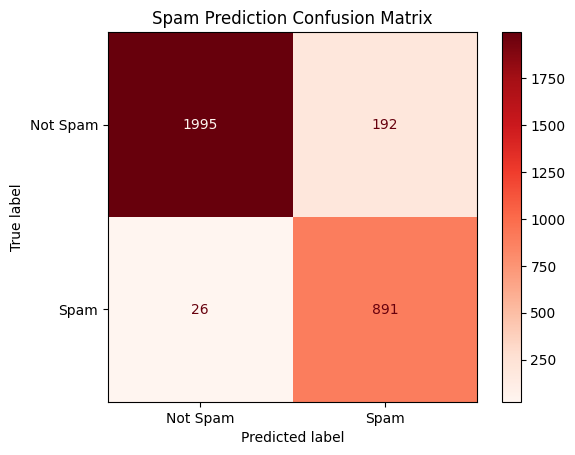

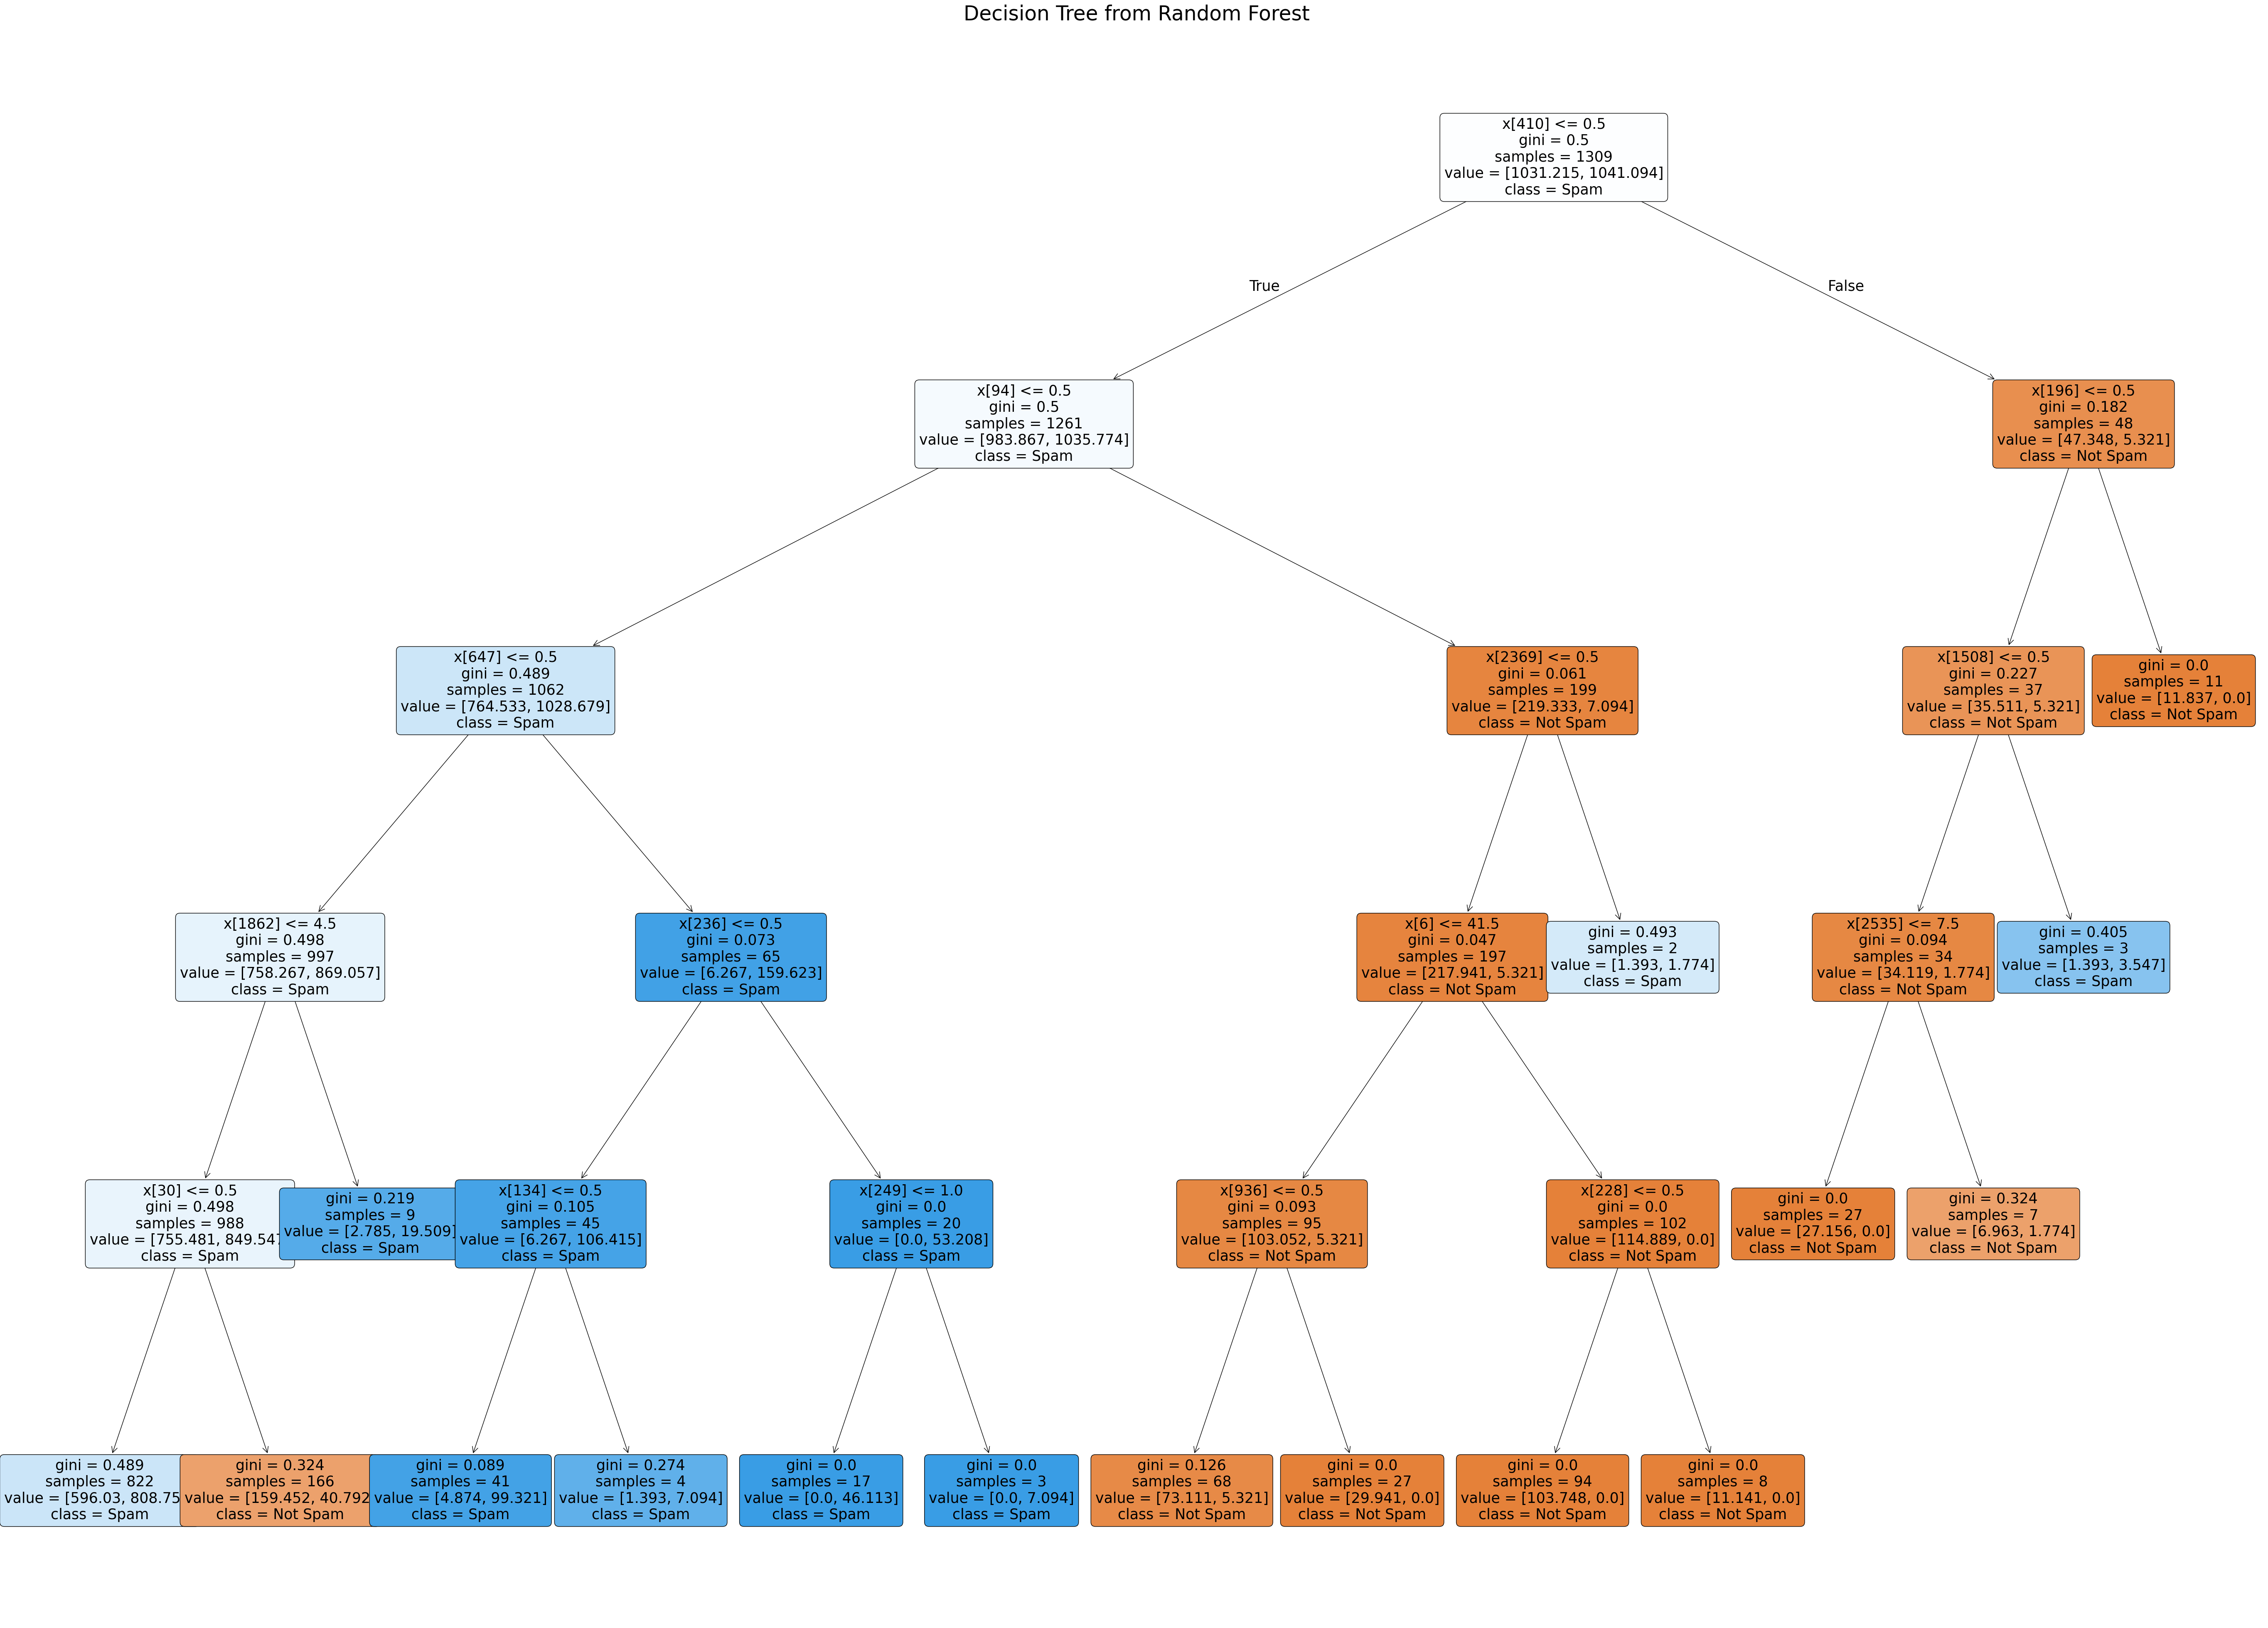

In [40]:
print(f"Precision: {precision_score(y_test, predictions):.2f}")
print(f"Recall: {recall_score(y_test, predictions):.2f}")
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(f"F1-Score: {f1_score(y_test, predictions):.2f}")

cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Spam", "Spam"])

cm_display.plot(cmap="Reds")
plt.title("Spam Prediction Confusion Matrix")
plt.show()

single_tree = forest.estimators_[0]  # Access the first tree in the forest


plt.figure(figsize=(50, 30))

plot_tree(single_tree,
          class_names=['Not Spam', 'Spam'],
          filled=True,
          rounded=True,
          fontsize=20,
          )

plt.title("Decision Tree from Random Forest", fontsize=25)
plt.show()